<a href="https://colab.research.google.com/github/sapna-90/Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
Train_data = pd.read_csv('/content/CP_train_data.csv')

In [3]:
Test_data = pd.read_csv('/content/CP_test_data.csv')

**Exploratory Data Analysis**

In [4]:
# Combine train and test datasets for unified processing

data = pd.concat([Train_data, Test_data], ignore_index=True)

In [5]:
print("\n--- Exploratory Data Analysis (EDA) ---\n")


--- Exploratory Data Analysis (EDA) ---



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  5000 non-null   object
 1   Product Brand        5000 non-null   object
 2   categories           5000 non-null   object
 3   primaryCategories    5000 non-null   object
 4   reviews.date         5000 non-null   object
 5   reviews.text         5000 non-null   object
 6   reviews.title        4987 non-null   object
 7   sentiment            4000 non-null   object
dtypes: object(8)
memory usage: 312.6+ KB


In [7]:
data.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [8]:
# Check for null values
print("Null values in the dataset:\n", data.isnull().sum())

Null values in the dataset:
 Name of the product       0
Product Brand             0
categories                0
primaryCategories         0
reviews.date              0
reviews.text              0
reviews.title            13
sentiment              1000
dtype: int64


In [9]:
# To remove the null values from the data

data.dropna(inplace=True)

In [10]:
# Check for null values
print("Null values in the dataset:\n", data.isnull().sum())

Null values in the dataset:
 Name of the product    0
Product Brand          0
categories             0
primaryCategories      0
reviews.date           0
reviews.text           0
reviews.title          0
sentiment              0
dtype: int64


<ipython-input-11-3c7c98c8aaf9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['sentiment'], palette='viridis')


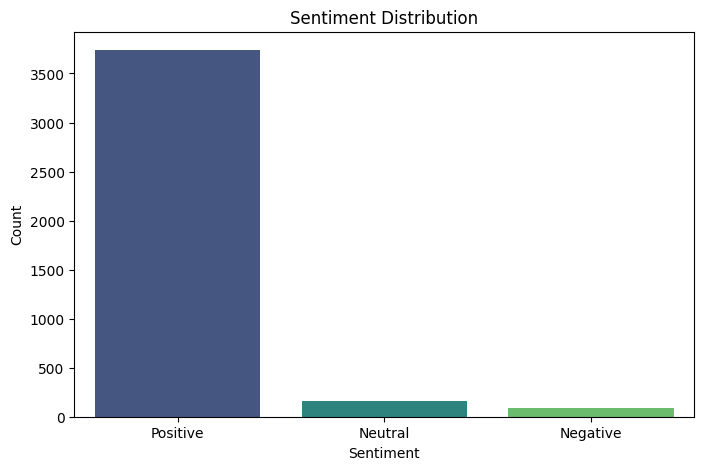

In [11]:
# Sentiment distribution analysis
plt.figure(figsize=(8, 5))
sns.countplot(x=data['sentiment'], palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

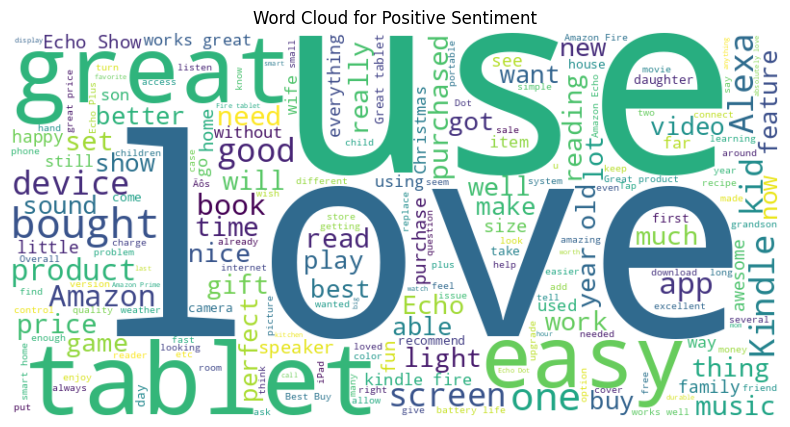

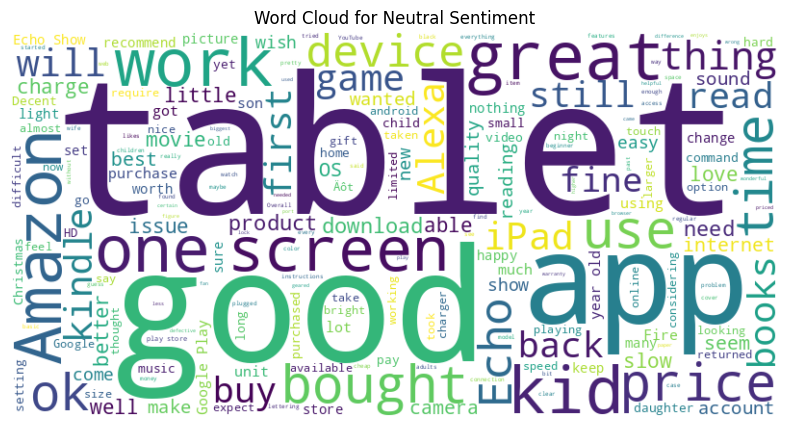

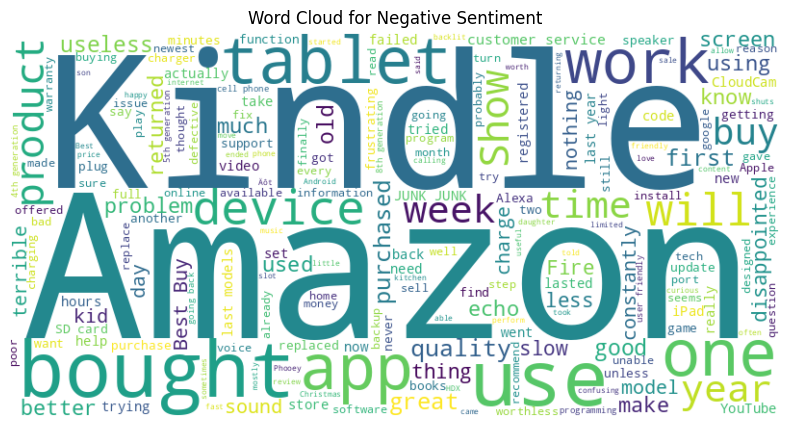

In [12]:
# Word Clouds for Positive, Neutral, and Negative Sentiments
for sentiment in data['sentiment'].unique():
    sentiment_text = ' '.join(data[data['sentiment'] == sentiment]['reviews.text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.axis('off')
    plt.show()

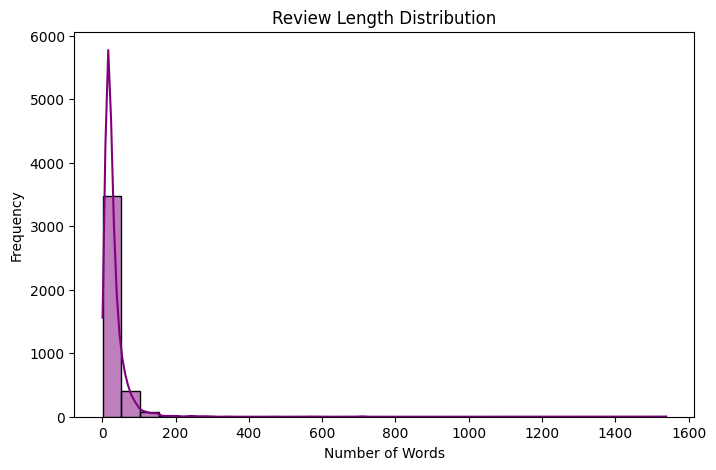

In [13]:
# Distribution of review lengths
data['review_length'] = data['reviews.text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
sns.histplot(data['review_length'], bins=30, kde=True, color='purple')
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

**Addressing Class Imbalance**



In [14]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [15]:
print("\n--- Addressing Class Imbalance ---\n")



--- Addressing Class Imbalance ---



In [16]:
# Check original class distribution
print("Original Sentiment Distribution:\n", Counter(data['sentiment']))

Original Sentiment Distribution:
 Counter({'Positive': 3739, 'Neutral': 158, 'Negative': 93})


In [17]:
# Combine 'reviews.title' and 'reviews.text' into a single column
data['combined_review'] = data['reviews.title'] + " " + data['reviews.text']

In [18]:
# Apply oversampling on the combined column
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(data[['combined_review']], data['sentiment'])

In [19]:
# Update DataFrame for balanced data
balanced_data = pd.DataFrame({'review': X_resampled['combined_review'], 'sentiment': y_resampled})

# Check new class distribution
print("Balanced Sentiment Distribution:\n", Counter(balanced_data['sentiment']))

Balanced Sentiment Distribution:
 Counter({'Positive': 3739, 'Neutral': 3739, 'Negative': 3739})


**Feature Engineering: TF-IDF Transformation**

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

print("\n--- TF-IDF Transformation ---\n")


--- TF-IDF Transformation ---



In [21]:
# Convert text data into numerical form using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf.fit_transform(balanced_data['review']).toarray()
y = balanced_data['sentiment']

In [22]:
# Display shape of the transformed data
print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")

TF-IDF Matrix Shape: (11217, 4775)


**Multinomial Naive Bayes Classifier**


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\n--- Multinomial Naive Bayes Classifier ---\n")


--- Multinomial Naive Bayes Classifier ---



In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# Train a Multinomial Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [26]:
# Predict on test data
y_pred_nb = nb_model.predict(X_test)

In [27]:
# Evaluate the model
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Classification Report:
               precision    recall  f1-score   support

    Negative       0.97      1.00      0.98       748
     Neutral       0.93      0.97      0.95       748
    Positive       0.98      0.91      0.94       748

    accuracy                           0.96      2244
   macro avg       0.96      0.96      0.96      2244
weighted avg       0.96      0.96      0.96      2244

Confusion Matrix:
 [[748   0   0]
 [  7 724  17]
 [ 16  53 679]]
Accuracy: 0.9585561497326203


**Support Vector Machine (SVM) Classifier**



In [28]:
from sklearn.svm import SVC